# Determination of the periastron/apoastron of null geodesics in Schwarzschild spacetime

In [1]:
%display latex

## The cubic polynomial

In [2]:
r, b, m = var('r b m', domain='real')

In [3]:
P(r, b, m) = r^3 - b^2*r + 2*m*b^2
P(r, b, m)

2*b^2*m - b^2*r + r^3

## Roots via Viète's trigonometric method

In [4]:
r0 = 2/sqrt(3)*b*cos(pi/3 - arccos(3*sqrt(3)*m/b)/3)
r0

2/3*sqrt(3)*b*cos(1/3*pi - 1/3*arccos(3*sqrt(3)*m/b))

In [5]:
P(r0, b, m).simplify_full().trig_reduce()

0

In [6]:
r1 = 2/sqrt(3)*b*cos(pi - arccos(3*sqrt(3)*m/b)/3)
r1

2/3*sqrt(3)*b*cos(pi - 1/3*arccos(3*sqrt(3)*m/b))

In [7]:
P(r1, b, m).simplify_full().trig_reduce()

0

In [8]:
r2 = 2/sqrt(3)*b*cos(5*pi/3 - arccos(3*sqrt(3)*m/b)/3)
r2

2/3*sqrt(3)*b*cos(5/3*pi - 1/3*arccos(3*sqrt(3)*m/b))

In [9]:
P(r2, b, m).simplify_full().trig_reduce()

0

In [10]:
rm(b) = r1.subs({m: 1})
rp(b) = r0.subs({m: 1})
ra(b) = r2.subs({m: 1})

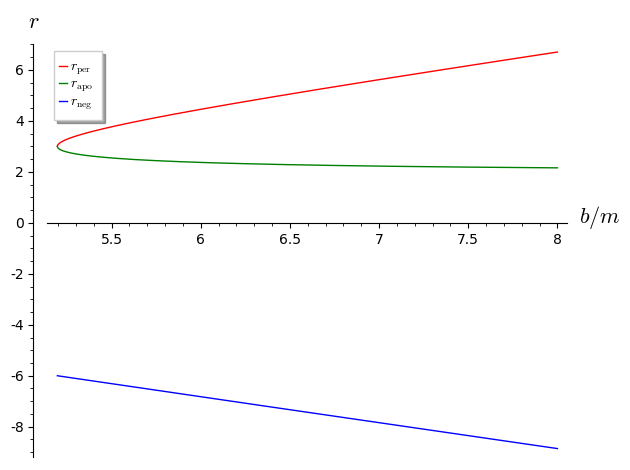

In [11]:
g = plot(rp(b), (b, 3*sqrt(3), 8), color='red', legend_label=r'$r_{\rm per}$',
         axes_labels=[r'$b/m$', r'$r$']) \
    + plot(ra(b), (b, 3*sqrt(3), 8), color='green', legend_label=r'$r_{\rm apo}$') \
    + plot(rm(b), (b, 3*sqrt(3), 8), color='blue', legend_label=r'$r_{\rm neg}$')
g

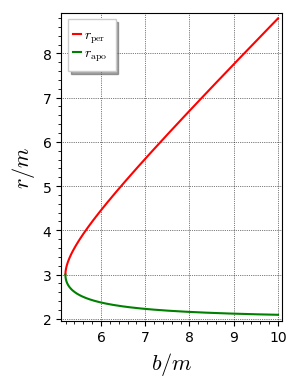

In [12]:
g = plot(rp(b), (b, 3*sqrt(3), 10), color='red', thickness=1.5,
         legend_label=r'$r_{\rm per}$', axes_labels=[r'$b/m$', r'$r/m$'], 
         frame=True, gridlines=True, aspect_ratio=1) \
    + plot(ra(b), (b, 3*sqrt(3), 10), color='green', thickness=1.5,
           legend_label=r'$r_{\rm apo}$')
g

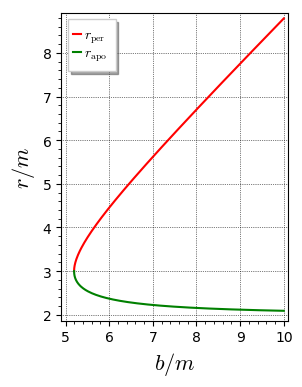

In [13]:
show(g, xmin=5, ymin=2)

In [14]:
g.save('ges_null_per_apo.pdf', xmin=5, ymin=2)